# COGS 118B - Final Project

# Insert title here

## Group members

- Olimpia Carrioli
- Vladimir Em
- Adolfo Valencia

# Abstract 
Our project aims at facilitating the process of finding and segmenting brain tumors from MRI imaging. For our data we unified 3 data sets from 3 iterations of the 'Brain Tumor Segmentation' challenge. The data sets in question are BRATS2020, BRATS2019, BRATS2018. These data represent a collection of 3D MRI scans collected over 3 years. The following is measured in the data set: native scans (T1) and post-contrast T1-weighted (T1Gd) scans T2-weighted (T2) scans, and T2 Fluid Attenuated Inversion Recovery (T2-FLAIR) volumes. We focused only on the T2-FLAIR images and ground truth labels, which we used to perform our analysis. We utilized Fuzzy C-Means clustering for tumor segmentation, which is an extension of K-Means using fuzzy logic, and thus allows soft-assignment. We tested our model using Dice Score and Jaccard Index achieving XXX

# Background

Brain tumor segmentation is a long-standing challenge in the medical field: the development of accurate and efficient techniques to detect brain tumors from medical imaging such as MRI (magnetic resonance imaging) would make diagnosis more accessible and facilitate prompt treatment.

Historically, brain tumor segmentation has been based on simple yet effective threshold techniques, where an intensity value is selected as threshold, and voxels (3-dimensional pixels) with higher intensity are marked as tumor tissue[1].

In recent years the development of neural networks has improved the accuracy of MRI tumor detection. One well-performing family of architectures are Convolutional Neural Networks, in which an MRI image is convolved with several kernels, allowing for the detection of tumor-like features and ultimately the segmentation of the tumor itself[2]. Critically, CNNs must be trained on labeled data, hence they require the manual expert segmentation of brain tumors. Given that a large dataset is essential for optimal training, the need for manually segmented images represents a drawback of this architecture.

Even more accurate brain tumor segmentation is achieved though the SOTA technique of U-NETs, developed by Olaf Ronnenberg and colleagues in 2015 for medical imaging segmentation[3]. U-NET architectures harness an encoding path (for downsampling, similar to a CNN) and a decoding path (for upsampling, through successive convolutions and upsampling operations) to precisely localize tumors with limited datasets, which is revolutionary for the field and a leap from traditional CNNs[4].

# Problem Statement
This project is aimed at tackling the problem of automatic brain tumor semantic segmentation from medical imaging. More specifically, given a high-resolution (1x1x1mm) MRI image of the brain, we aim at assigning each voxel to one of C clusters based on pixel intensity, which reflects the biological composition of that voxel (tumor tissue, white matter, etc.). This task is relevant to machine-learning, as it involves clustering algorithms such as C-Means and neural-network-based solutions.

# Data 
### Dataset 1: BRATS 2018 <a name="BRATS1"></a>[<sup>[5]</sup>](#BRATS1) <a name="BRATS2"></a>[<sup>[6]</sup>](#BRATS2) <a name="BRATS3"></a>[<sup>[7]</sup>](#BRATS3)
- https://www.kaggle.com/datasets/harshitsinghai/miccai-brats2018-original-dataset?select=MICCAI_BraTS_2018_Data_Validation 
- This dataset contains 351 MRI brain volumes of patients with malignant high-grade glioma (HGG) and low-grade gliomas (LGG).
- The scans are stored as NIfTI files (.nii.gz) and are presented with 4 different contrasts to enhance the tumor visibility:
    - native (T1)
    - post-contrast T1-weighted (T1Gd)
    - T2-weighted (T2)
    - T2 Fluid Attenuated Inversion Recovery (FLAIR)
- 285 volumes have ground-truth brain-tumor segmentation done by hand and approved by neuro-radiologists, also stored in NIfTI format.
- The volumes' resolution is 1x1x1mm.
- The dataset includes a csv file of overall survival of each patient in days, age of patients, and resection status.

### Dataset 2: BRATS 2019 <a name="BRATS1"></a>[<sup>[5]</sup>](#BRATS1) <a name="BRATS2"></a>[<sup>[6]</sup>](#BRATS2) <a name="BRATS3"></a>[<sup>[7]</sup>](#BRATS3)
- https://www.kaggle.com/datasets/aryashah2k/brain-tumor-segmentation-brats-2019?select=MICCAI_BraTS_2019_Data_Training 
- This dataset contains 335 MRI brain volumes of patients with malignant high-grade glioma (HGG - 259 instances) and low-grade gliomas (LGG - 76 instances).
- The scans are stored as NIfTI files (.nii.gz) and are presented with 4 different contrasts to enhance the tumor visibility:
    - native (T1)
    - post-contrast T1-weighted (T1Gd)
    - T2-weighted (T2)
    - T2 Fluid Attenuated Inversion Recovery (FLAIR)
- All the volumes have ground-truth brain-tumor segmentation done by hand and approved by neuro-radiologists, also stored in NIfTI format.
- The volumes' resolution is 1x1x1mm.
- The dataset includes a csv file of overall survival of each patient in days, age of patients, and resection status.

### Dataset 3: BRATS 2020 <a name="BRATS1"></a>[<sup>[5]</sup>](#BRATS1) <a name="BRATS2"></a>[<sup>[6]</sup>](#BRATS2) <a name="BRATS3"></a>[<sup>[7]</sup>](#BRATS3)
- https://www.kaggle.com/datasets/awsaf49/brats2020-training-data 
- This dataset contains 494 MRI brain volumes of patients with malignant high-grade glioma (HGG) and low-grade gliomas (LGG).
- The scans are stored as NIfTI files (.nii.gz) and are presented with 4 different contrasts to enhance the tumor visibility:
    - native (T1)
    - post-contrast T1-weighted (T1Gd)
    - T2-weighted (T2)
    - T2 Fluid Attenuated Inversion Recovery (FLAIR)
- 369 volumes have ground-truth brain-tumor segmentation done by hand and approved by neuro-radiologists, also stored in NIfTI format.
- The volumes' resolution is 1x1x1mm.
- The dataset includes a csv file of overall survival of each patient in days, age of patients, and resection status.

### Data handling
- Run [script](script.py) to save flair images and ground truth labels in two separate repositories (`flair_imgs` and `seg_imgs` respectively)
- Handle the data using the Nilearn library, an MRI-specific python package.


In [4]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skfuzzy import cmeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.model_selection import ParameterGrid

In [5]:
data_directory = 'flair_imgs'
flair_imgs = {}

# load all flair files
for file_name in os.listdir(data_directory):
    if file_name.endswith('.nii'):  
        file_path = os.path.join(data_directory, file_name)
        image_data = nib.load(file_path).get_fdata()
        flair_imgs[file_name]=image_data

data_directory = 'seg_imgs'
seg_imgs = {}

for file_name in os.listdir(data_directory):
    if file_name.endswith('.nii'):
        file_path = os.path.join(data_directory, file_name)
        image_data = nib.load(file_path).get_fdata()
        seg_imgs[file_name] = image_data

print(f'# Flair Images: {len(flair_imgs)}')
print(f'# True Label Images: {len(seg_imgs)}')

# Flair Images: 1114
# True Label Images: 866


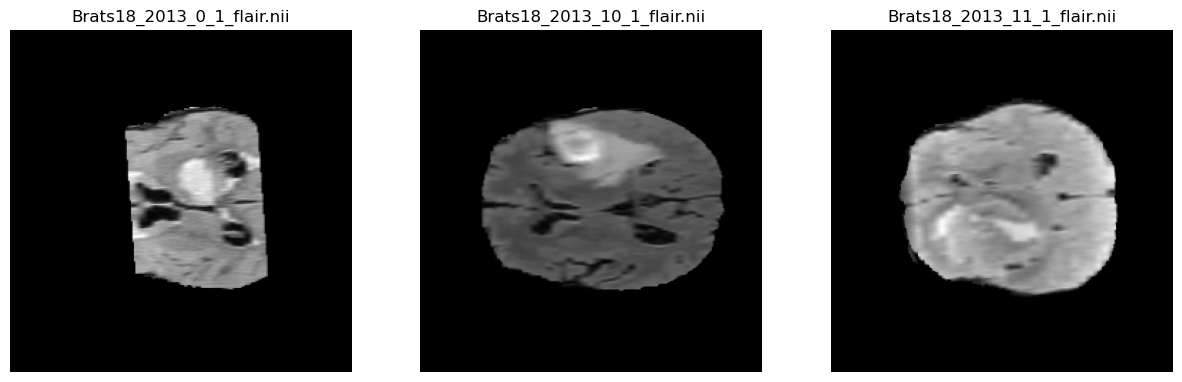

In [13]:
def plot_middle_slice(ax, img_data, title):
    ax.imshow(img_data[:, :, img_data.shape[2] // 2], cmap='gray')
    ax.set_title(title)
    ax.axis('off')


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot first 3 flair images
for i, (key, img_data) in enumerate(flair_imgs.items()):
    if i >= 3 : break
    plot_middle_slice(axes[i], img_data, title=key)

plt.show()

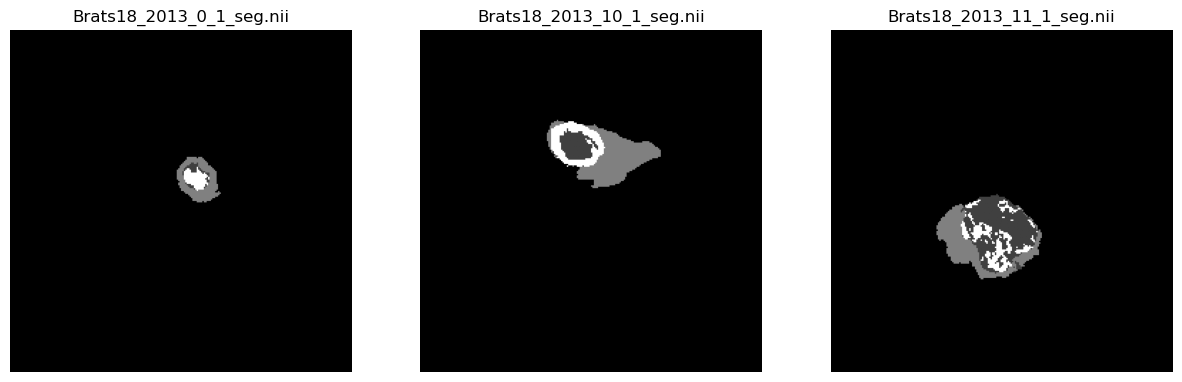

In [4]:
# Plot the middle slice of the first three seg images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (key, img_data) in enumerate(seg_imgs.items()):
    if i >= 3 : break
    plot_middle_slice(axes[i], img_data, title=key)

plt.show()

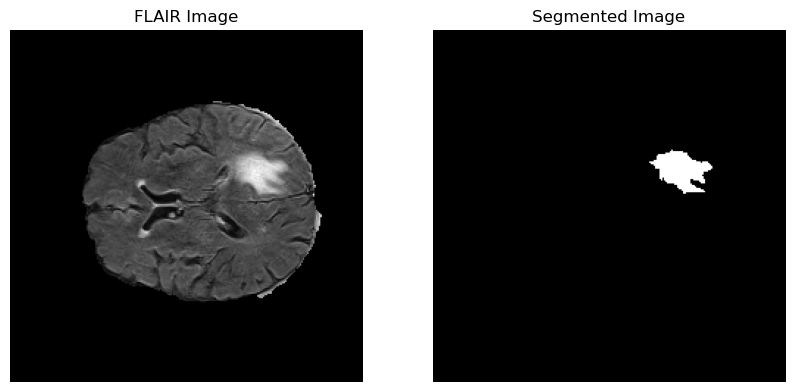

In [5]:
flair_image = flair_imgs['BraTS20_Training_052_flair.nii']
seg_image = seg_imgs['BraTS20_Training_052_seg.nii']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_middle_slice(axes[0], flair_image, title='FLAIR Image')
plot_middle_slice(axes[1], seg_image, title='Segmented Image')

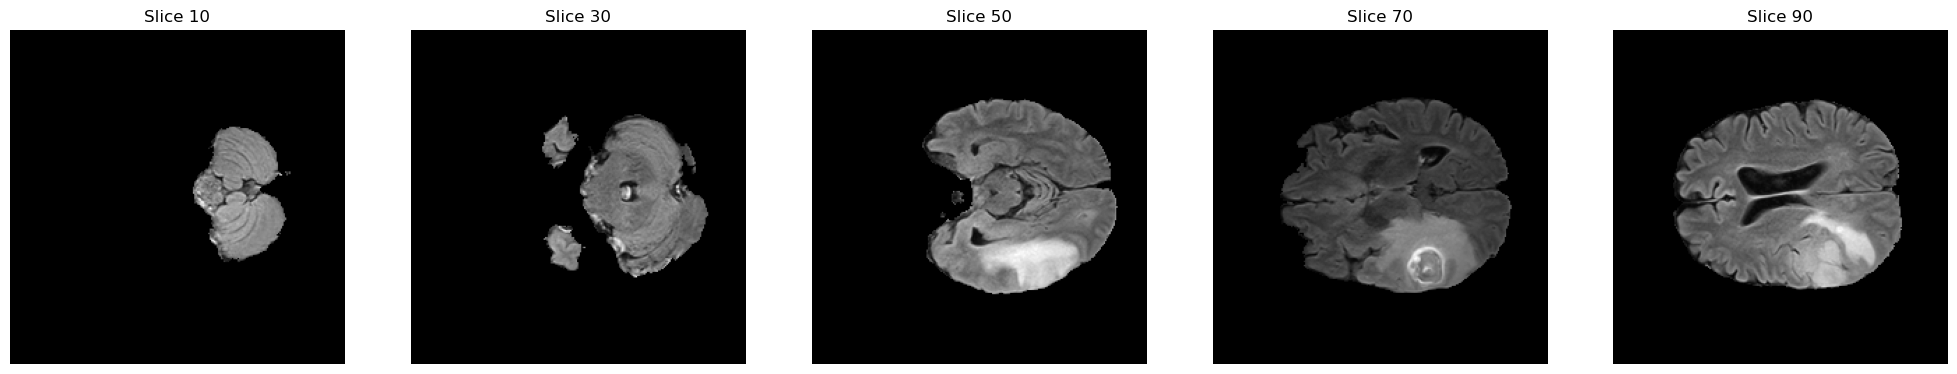

In [6]:
# Plot multiple slices
flair_image=flair_imgs['BraTS19_CBICA_ASY_1_flair.nii']
fig, axes = plt.subplots(1, 5, figsize=(25, 10))
for i, slice_idx in enumerate(range(10, 101, 20)):
    axes[i].imshow(flair_image[:, :, slice_idx], cmap='gray')
    axes[i].set_title(f'Slice {slice_idx}')
    axes[i].axis('off')
plt.show()


# Proposed Solution

For our solution we utilized Fuzzy C-Means. Soft clustering allows us to assign voxels to multiple classes with varying degrees of membership. This approach seamlessly pairs with our data set, since the data set provides us with a variety of high-resolution 3D scans. We relied mostly on a Python implementation using scikit-fuzzy. The data was pre-processed using histogram equalization to enhance pixel contrast. The C-Means model outputs the segmented version of the brain volume. This is a mask in which each voxel has assigned a value which indicates its membership to one of C clusters. We evaluate the segmentation by keeping track of Dice Score and Jaccard Index, discussed in more detail below.

The algorithm itself consists of the following steps:

1. Initialization - Here we choose the number of clusters and initialize cluster centers.

2. Membership Assignment - Here we calculate the probability of each voxel belonging to each cluster.

3. Cluster Center Update - Here we calculate the updated weights, so that the centers represent the mean feature of the cluster.

4. Iteration - Perform the previous 2 steps until changes in clusters are below a certain threshold.


Post-processing - Perform the segmentation and generate the output.


In [7]:
flair_image = flair_imgs['BraTS20_Training_052_flair.nii']
seg_image = seg_imgs['BraTS20_Training_052_seg.nii']
flair_eq = exposure.equalize_hist(flair_image)
data = flair_eq.flatten()  # Flatten the image to a 1D array
data = np.vstack((data,))  # Convert to a 2D array with one feature

In [8]:
#Apply RFCM
cntr, u, u0, d, jm, p, fpc = cmeans(data, c=4, m=3, error=0.005, maxiter=1000, init=None)

In [9]:
labels = np.argmax(u, axis=0)
segmented_image = labels.reshape(flair_eq.shape)

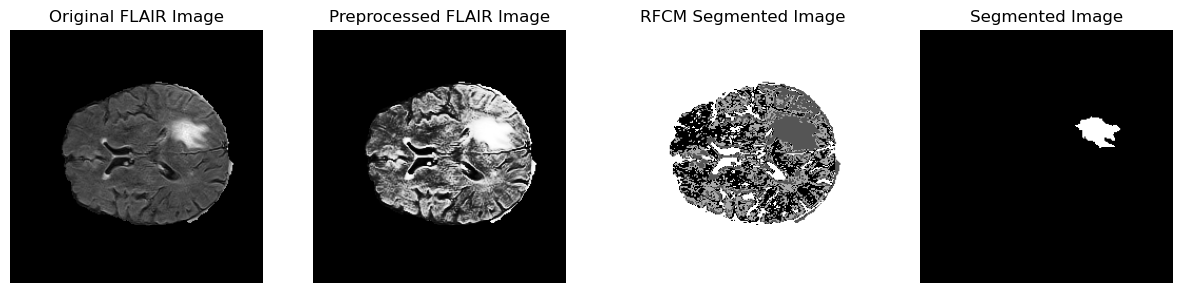

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
plot_middle_slice(axes[0], flair_image, title='Original FLAIR Image')
plot_middle_slice(axes[1], flair_eq, title='Preprocessed FLAIR Image')
plot_middle_slice(axes[2], segmented_image, title='RFCM Segmented Image')
plot_middle_slice(axes[3], seg_image, title='Segmented Image')


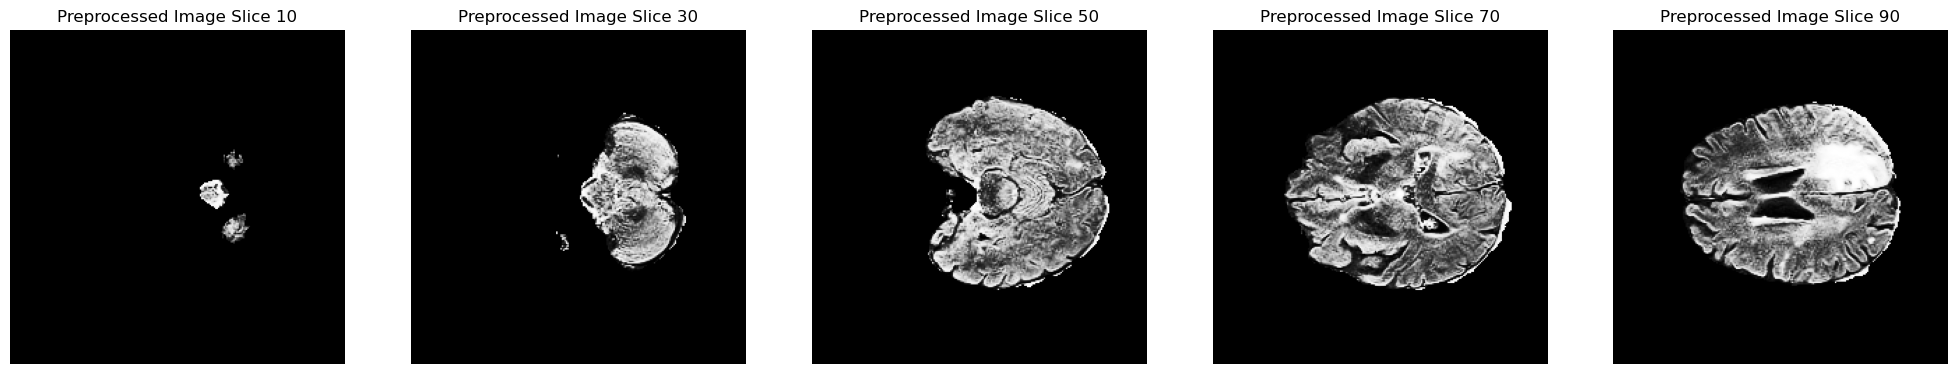

In [11]:
# Visualize preprocessed image
fig, axes = plt.subplots(1, 5, figsize=(25, 10))
for i, slice_idx in enumerate(range(10, 101, 20)): 
    axes[i].imshow(flair_eq[:, :, slice_idx], cmap='gray')
    axes[i].set_title(f'Preprocessed Image Slice {slice_idx}')
    axes[i].axis('off')
plt.show()

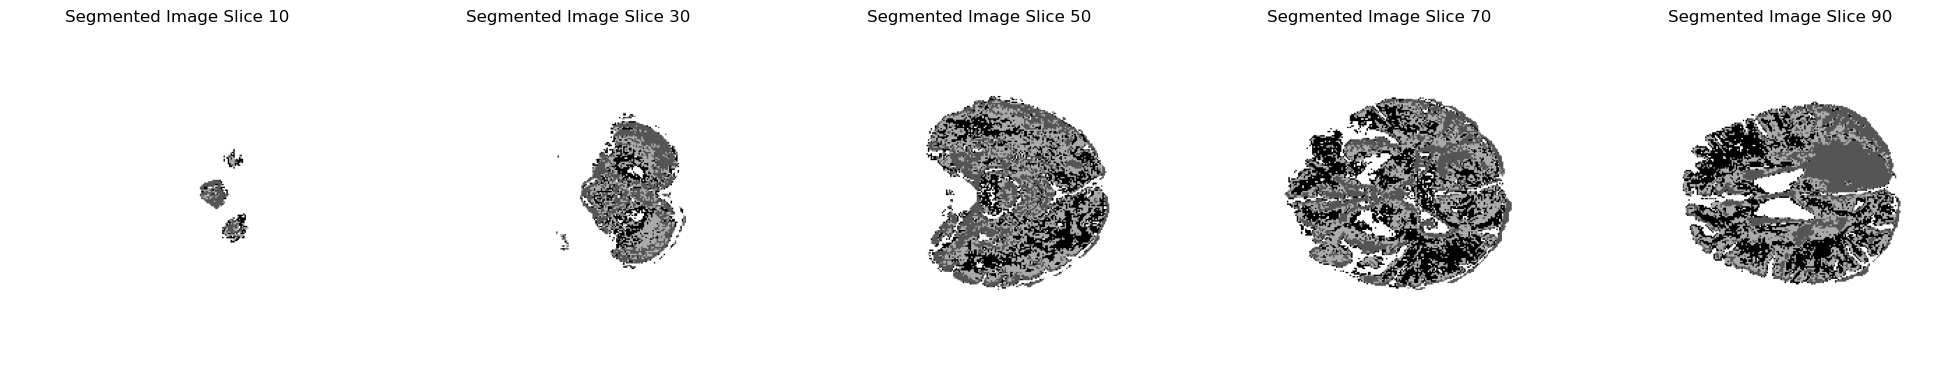

In [12]:
# Visualize Segmented Image
fig, axes = plt.subplots(1, 5, figsize=(25, 10))
for i, slice_idx in enumerate(range(10, 101, 20)):  
    axes[i].imshow(segmented_image[:, :, slice_idx], cmap='gray')
    axes[i].set_title(f'Segmented Image Slice {slice_idx}')
    axes[i].axis('off')
plt.show()

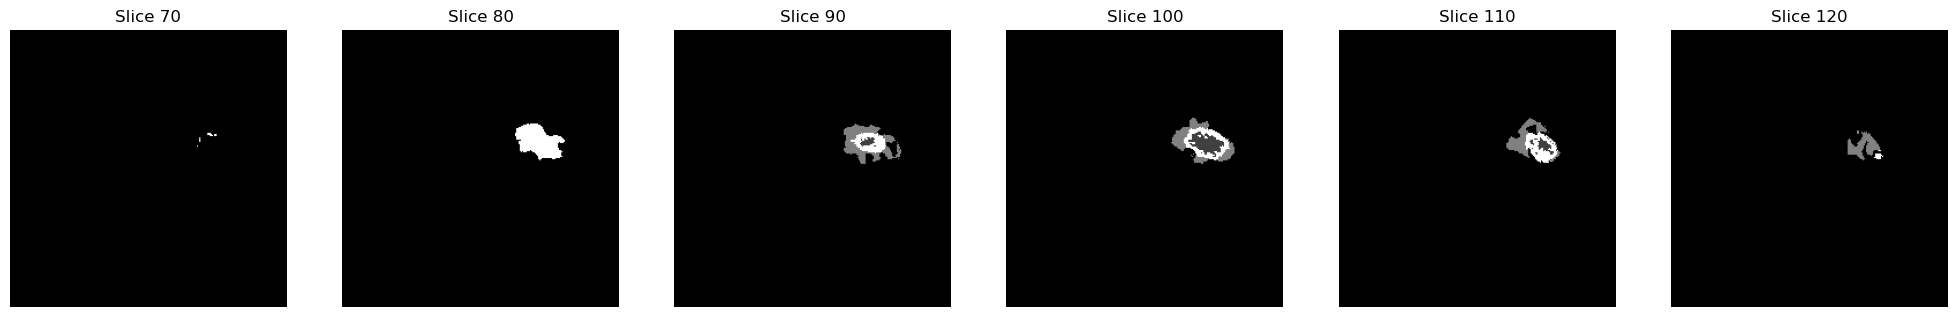

In [13]:
# Visualize True Label
num_slices = 6
fig, axes = plt.subplots(1, num_slices, figsize=(25, 10))
for i, slice_idx in enumerate(np.linspace(70, 120, num_slices).astype(int)):  
    axes[i].imshow(seg_image[:, :, slice_idx], cmap='gray')
    axes[i].set_title(f'Slice {slice_idx}')
    axes[i].axis('off')
plt.show()

# Hyperparameter tuning and Metrics

In [6]:
import cupy as cp


In [7]:
num_devices = cp.cuda.runtime.getDeviceCount()
print("Number of CUDA devices:", num_devices)
for i in range(num_devices):
    prop = cp.cuda.runtime.getDeviceProperties(i)
    print("Device {}:".format(i))
    print("  Name:", prop["name"])
    print("  Memory:", prop["totalGlobalMem"] / (1024**3), "GB")
    print("  Compute capability:", prop["major"], ".", prop["minor"])
def calculate_ari(true_labels, predicted_labels):
    # ARI doesn't need adjustment for inverted labels
    inverted_true_labels = 1 - true_labels
    return adjusted_rand_score(inverted_true_labels, predicted_labels)


def calculate_dice_coefficient(true_labels, predicted_labels):
    # Invert the true labels
    inverted_true_labels = 1 - true_labels
    intersection = cp.sum(predicted_labels[inverted_true_labels == 1])
    return 2. * intersection / (cp.sum(predicted_labels) + cp.sum(inverted_true_labels))


def calculate_jaccard_index(true_labels, predicted_labels):
    # Invert the true labels
    inverted_true_labels = 1 - true_labels
    intersection = cp.sum(predicted_labels[inverted_true_labels == 1])
    union = cp.sum(predicted_labels) + cp.sum(inverted_true_labels) - intersection
    return intersection / union 




Number of CUDA devices: 1
Device 0:
  Name: b'NVIDIA GeForce RTX 4090'
  Memory: 23.98779296875 GB
  Compute capability: 8 . 9


In [8]:

class FuzzyCMeansGPU:
    def __init__(self, n_clusters=3, max_iter=1000, m=2.0, error=0.005):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.m = m
        self.error = error

    def initialize_membership(self, n_samples):
        membership_mat = cp.random.dirichlet(cp.ones(self.n_clusters), size=n_samples)
        return membership_mat

    def update_membership(self, data, cluster_centers):
        p = 2. / (self.m - 1)
        distances = cp.zeros((data.shape[0], self.n_clusters))
        for i, center in enumerate(cluster_centers):
            distances[:, i] = cp.linalg.norm(data - center, axis=1)
        distances = cp.fmax(distances, 1e-8)
        inv_distances = 1.0 / distances
        weights = inv_distances ** p
        membership_mat = weights / cp.sum(weights, axis=1, keepdims=True)
        return membership_mat

    def compute_centers(self, data, membership_mat):
        membership_mat_m = membership_mat ** self.m
        cluster_centers = cp.dot(membership_mat_m.T, data) / cp.sum(membership_mat_m.T, axis=1, keepdims=True)
        return cluster_centers

    def fit(self, data):
        n_samples = data.shape[0]
        membership_mat = self.initialize_membership(n_samples)
        for iteration in range(self.max_iter):
            old_membership_mat = membership_mat.copy()
            cluster_centers = self.compute_centers(data, membership_mat)
            membership_mat = self.update_membership(data, cluster_centers)
            if cp.linalg.norm(membership_mat - old_membership_mat) < self.error:
                break
        self.cluster_centers_ = cluster_centers
        self.membership_mat_ = membership_mat
        self.labels_ = cp.argmax(membership_mat, axis=1)


In [9]:
def preprocess_image(image_data):
    return exposure.equalize_hist(image_data)


def apply_fcm_clustering(flair_image_data, c, m):
    preprocessed_image = preprocess_image(flair_image_data)

    data = preprocessed_image.flatten()
    data = cp.vstack((data,))

    fcm = FuzzyCMeansGPU(n_clusters=c, m=m, error=0.005, max_iter=1000)
    fcm.fit(data.T)  # Transpose data to match expected shape (features, samples)

    segmented_image = fcm.labels_.reshape(preprocessed_image.shape)
    return segmented_image



def apply_fcm_and_evaluate(flair_image_data, seg_image_data, c, m):
    segmented_image = apply_fcm_clustering(flair_image_data, c=c, m=m)

    metrics = None
    if seg_image_data is not None:
        true_labels = seg_image_data.flatten()
        predicted_labels = segmented_image.flatten() > 0.5

        dice = calculate_dice_coefficient(true_labels, predicted_labels)
        jaccard = calculate_jaccard_index(true_labels, predicted_labels)

        metrics = (np.float64(dice.get().item()), np.float64(jaccard.get().item()))
       
       
    return segmented_image, metrics

In [28]:
import time

In [ ]:


param_grid = {
    'c': [2, 3],
    'm': [1.5, 2, 2.5],
}

average_metrics_per_param_set = []
best_average_metrics = {'dice': 0, 'jaccard': 0}
best_params = None
 
start_time = time.time()
prev_time = start_time
for params in ParameterGrid(param_grid):
    metrics_list = []

    i = 0
    count = len(flair_imgs.items())

    for file_name, flair_data in flair_imgs.items():
        i += 1
        if i % 114== 0:
            p = round(i / count * 100, 2)
            print('C = ', params['c'], 'M = ', params['m'], "Progress: ", p, '% ', i, " out of ", count)
            t=(time.time() - start_time)
            h = round(t / 60, 0)
            m = round(t % 60, 0)
            print(f'Time passed: {h:.0f} minutes, {m:.0f} seconds')
        seg_data = seg_imgs.get(file_name.replace('_flair', '_seg'), None)
        if seg_data is not None:
            _, metrics = apply_fcm_and_evaluate(flair_data, seg_data, c=params['c'], m=params['m'])
            if metrics:

                metrics_list.append(metrics)
                
                
    t = time.time() - prev_time
    prev_time = time.time()
    h = round(t / 60, 0)
    m = round(t % 60, 0)
    print(f"Parameters {params['c']} and {params['m']} took {h:.0f} minutes, {m:.0f} seconds")
    if metrics_list:
        averages = tuple(np.mean(np.array(metrics_list), axis=0))
        average_metrics_per_param_set.append((params, averages))
        
        print()            
        print()
        print(f"Parameters: {params}, Dice: {averages[0]}, Jaccard: {averages[1]}")
        print()            
        print()
        
        mean_best_metrics = np.mean([best_average_metrics['dice'], best_average_metrics['jaccard']])
        if np.mean(averages) > mean_best_metrics:
            best_params = params
            best_average_metrics = {'dice': averages[0], 'jaccard': averages[1]}

print()            
print()            
print(f"Best Parameters: {best_params}")
print(f"Dice: {best_average_metrics['dice']}, Jaccard: {best_average_metrics['jaccard']}")
print()
print()

plt.figure(figsize=(10, 5))


flair_image = flair_imgs['BraTS20_Training_052_flair.nii']
seg_image = seg_imgs['BraTS20_Training_052_seg.nii']
flair_eq = exposure.equalize_hist(flair_image)

segmented_image = apply_fcm_clustering(flair_image, c=best_params['c'], m=best_params['m'])

labels = np.argmax(u, axis=0)
segmented_image = labels.reshape(flair_eq.shape)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_middle_slice(axes[0], segmented_image, title='RFCM Segmented Image')
plot_middle_slice(axes[1], seg_image, title='Segmented Image')


C =  2 M =  1.5 Progress:  10.23 %  114  out of  1114
Time passed: 3 minutes, 49 seconds
C =  2 M =  1.5 Progress:  20.47 %  228  out of  1114
Time passed: 6 minutes, 39 seconds
C =  2 M =  1.5 Progress:  30.7 %  342  out of  1114
Time passed: 9 minutes, 31 seconds
C =  2 M =  1.5 Progress:  40.93 %  456  out of  1114
Time passed: 11 minutes, 24 seconds
C =  2 M =  1.5 Progress:  51.17 %  570  out of  1114
Time passed: 14 minutes, 15 seconds
C =  2 M =  1.5 Progress:  61.4 %  684  out of  1114
Time passed: 17 minutes, 3 seconds
C =  2 M =  1.5 Progress:  71.63 %  798  out of  1114
Time passed: 19 minutes, 19 seconds
C =  2 M =  1.5 Progress:  81.87 %  912  out of  1114
Time passed: 22 minutes, 38 seconds
C =  2 M =  1.5 Progress:  92.1 %  1026  out of  1114
Time passed: 23 minutes, 52 seconds
Parameters 2 and 1.5 took 23 minutes, 52 seconds
Parameters: {'c': 2, 'm': 1.5}, Dice: 0.5573821642836717, Jaccard: 0.49616232122515797
C =  2 M =  2 Progress:  10.23 %  114  out of  1114
Time pas

# Evaluation Metrics (Vladimir)


Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

In [20]:
# This line configures Jupyter to display all outputs generated by a cell.
%config InteractiveShell.ast_node_interactivity = "last_expr"


Time passed: 0 minutes, 4 seconds


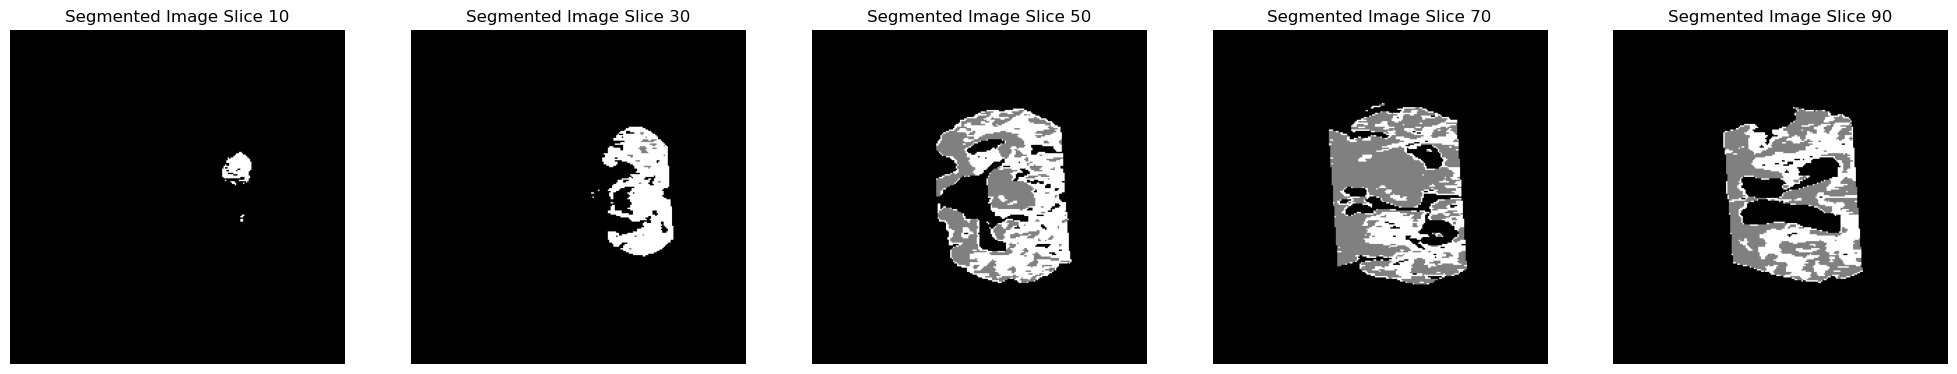

Time passed: 6 minutes, 17 seconds


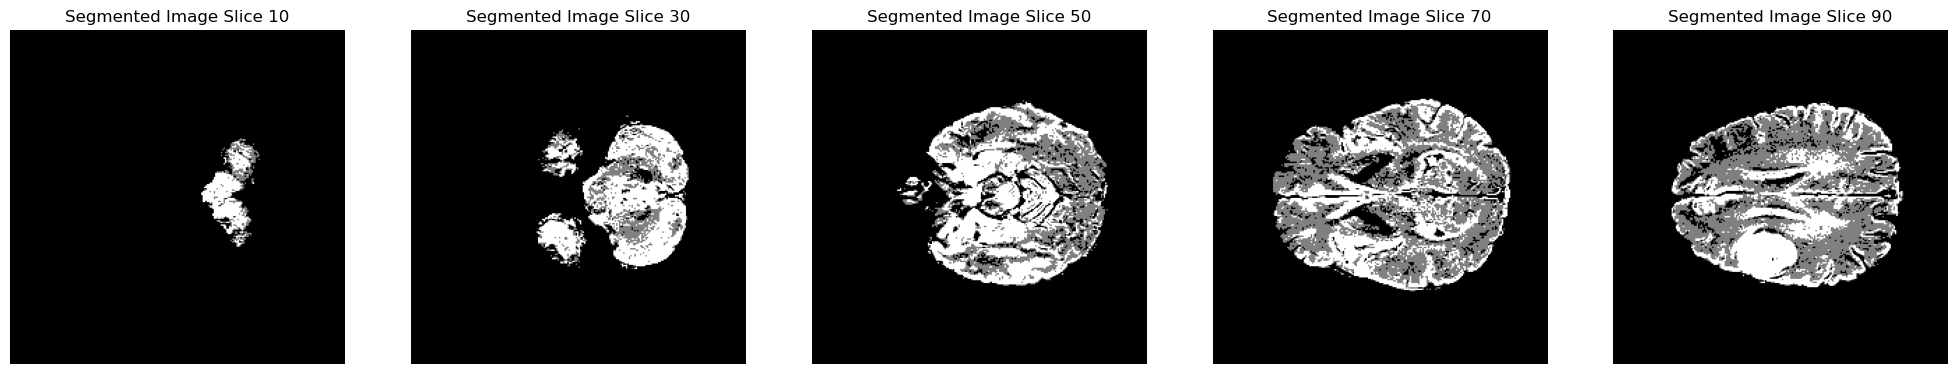

Time passed: 13 minutes, 38 seconds


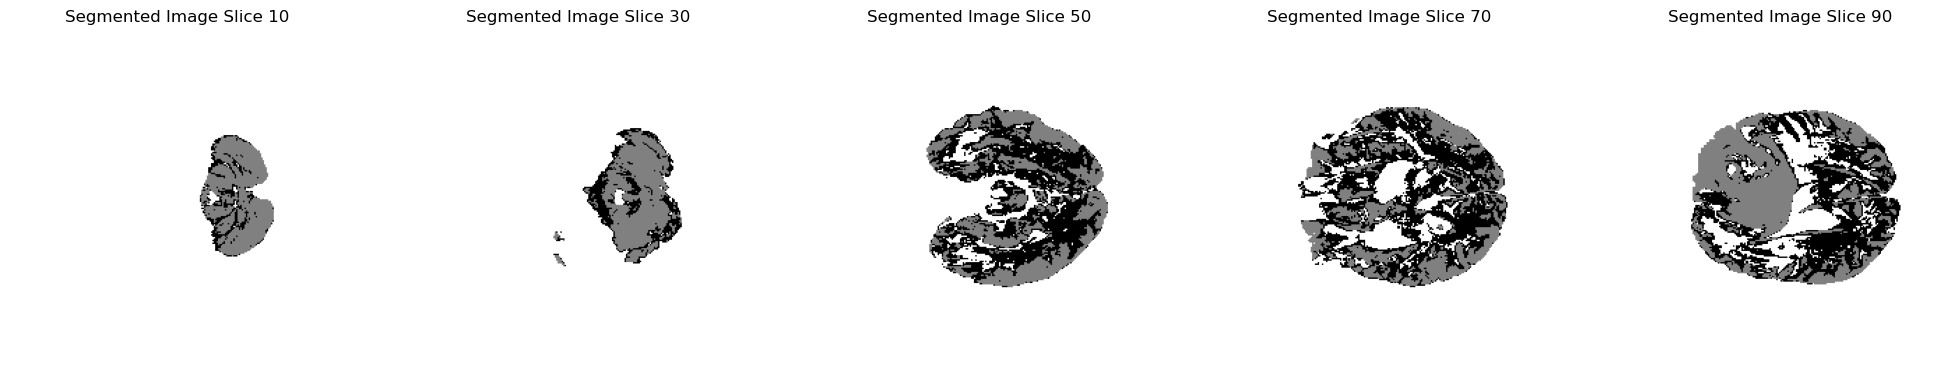

Time passed: 19 minutes, 54 seconds


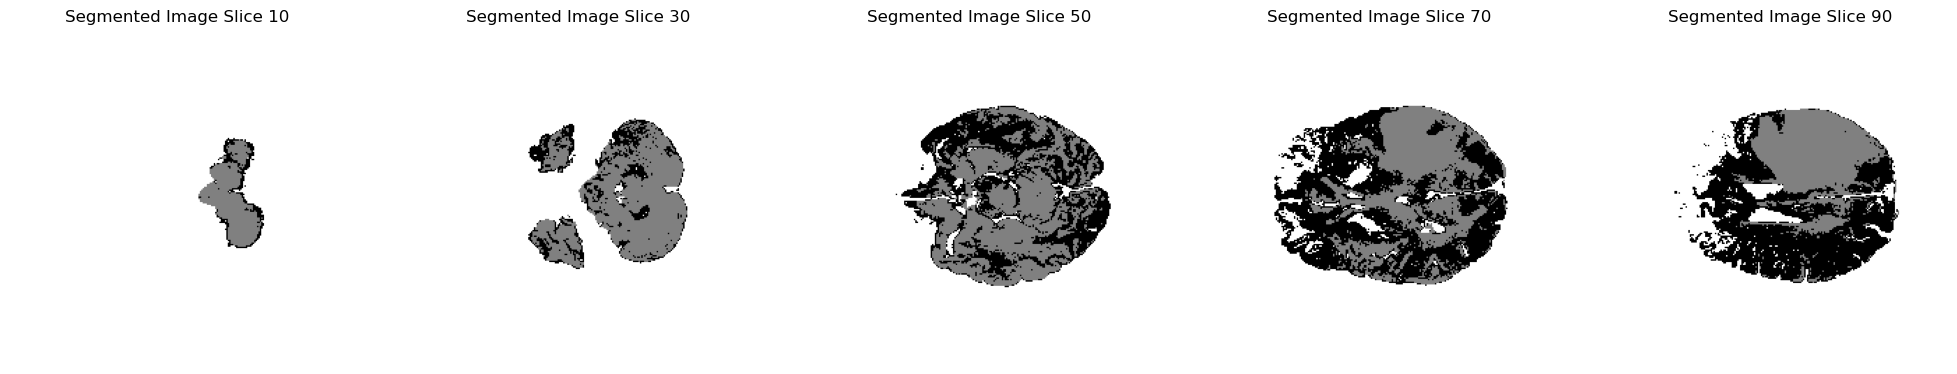

Time passed: 25 minutes, 7 seconds


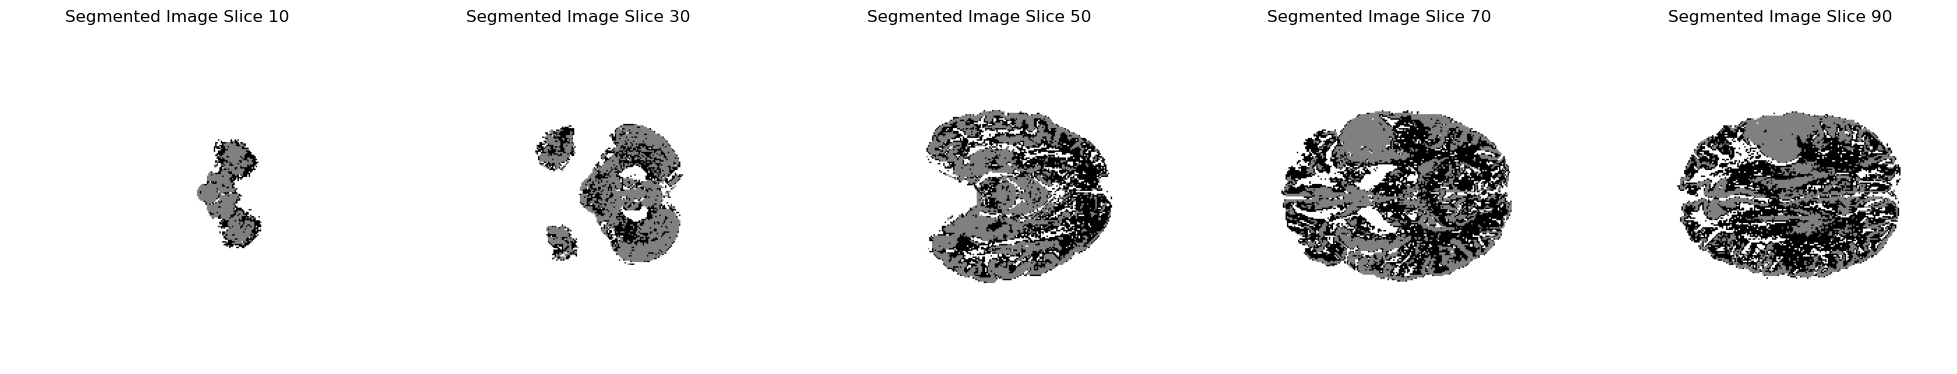

Time passed: 31 minutes, 24 seconds


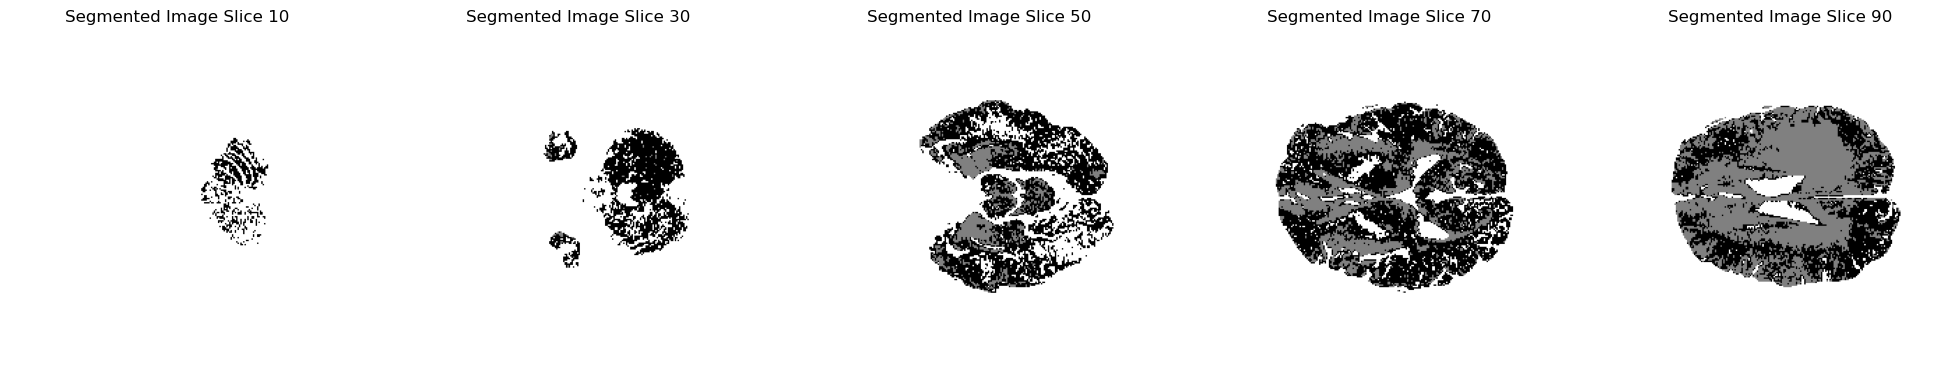

Time passed: 37 minutes, 12 seconds


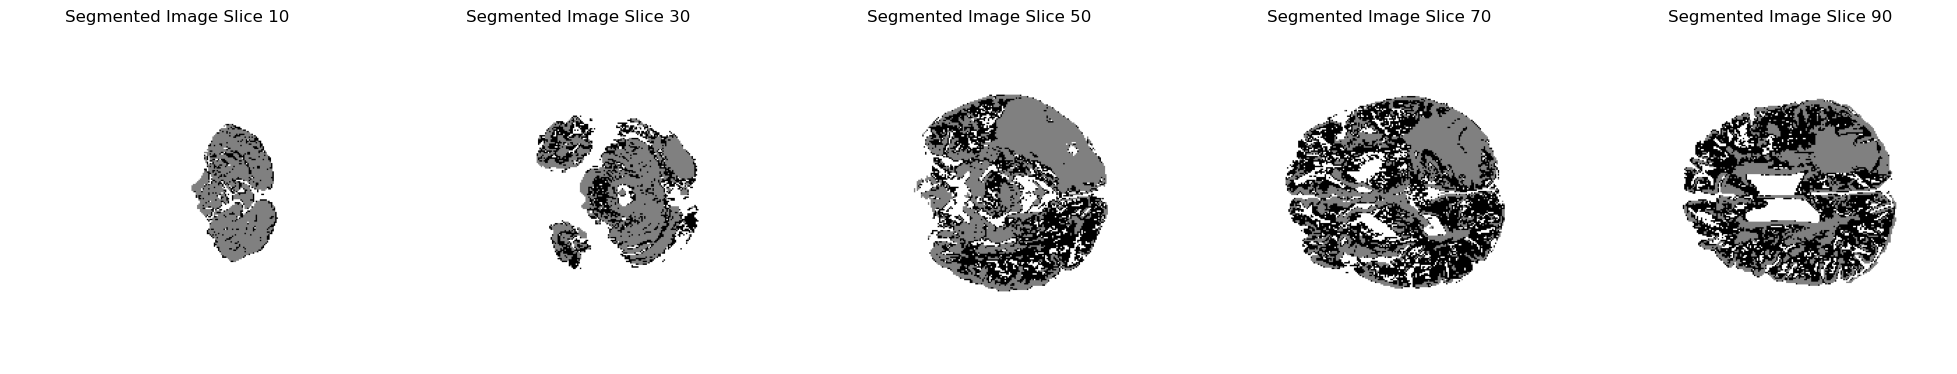

Time passed: 41 minutes, 25 seconds


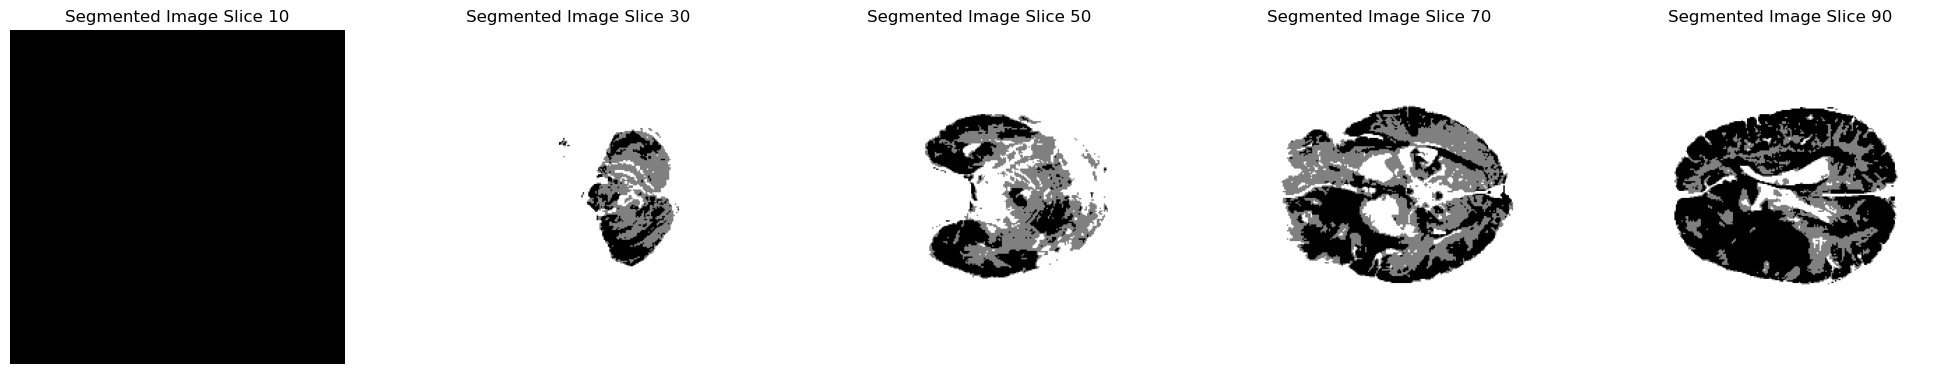

Time passed: 46 minutes, 34 seconds


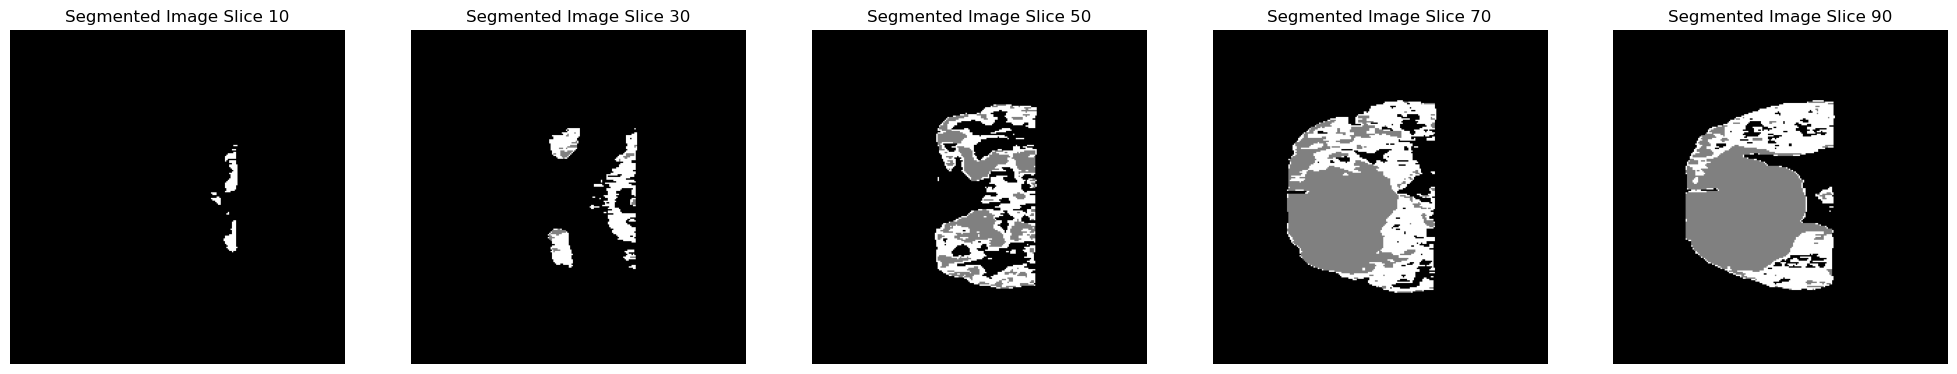



Dice: 0.7149151481593894, Jaccard: 0.6666073219968096




In [32]:
def plot_middle_slice(ax, img_data, title):
    img_data = img_data.get()
    ax.imshow(img_data[:, :, img_data.shape[2] // 2], cmap='gray')
    ax.set_title(title)
    ax.axis('off')





metrics_list = []
i=0
count = len(flair_imgs.items())
start_time = time.time()
prev_time = start_time 

for file_name, flair_data in flair_imgs.items():

   
   
    seg_data = seg_imgs.get(file_name.replace('_flair', '_seg'), None)  # Adjust for naming convention if needed
    
    
    if seg_data is not None:
            segmented_image, metrics = apply_fcm_and_evaluate(flair_data, seg_data, c=3, m=2.5)
            if i % 114== 0:
                p = round(i / count * 100, 2)
                t=(time.time() - start_time)
                h = round(t / 60, 0)
                m = round(t % 60, 0)
                print(f'Time passed: {h:.0f} minutes, {m:.0f} seconds')
           
            if metrics:
                if i % 114== 0:
                    fig, axes = plt.subplots(1, 5, figsize=(25, 10))
                    for i, slice_idx in enumerate(range(10, 101, 20)): 
                        img_data = segmented_image.get()
                        axes[i].imshow(img_data[:, :, slice_idx], cmap='gray')
                        axes[i].set_title(f'Segmented Image Slice {slice_idx}')
                        axes[i].axis('off')
                    plt.show()
                metrics_list.append(metrics)
    i += 1
    
    
if metrics_list:
        averages = tuple(np.mean(np.array(metrics_list), axis=0))
        
        print()            
        print()
        print(f"Dice: {averages[0]}, Jaccard: {averages[1]}")
        print()            
        print()
        

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result


OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations (Vladimir)

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

## Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

## A. Data Collection
 - [ ] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 - [ ] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 - [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?

## B. Data Storage
 - [ ] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 - [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

## C. Analysis
 - [ ] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 - [ ] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 - [ ] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [ ] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

## D. Modeling
 - [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 - [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [ ] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [ ] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [ ] **D.5 Communicate bias**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

## E. Deployment
 - [ ] **E.1 Monitoring and evaluation**: How are we planning to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?
 - [ ] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [ ] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [ ] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*
### Conclusion

This project is concerning automatic brain-tumor segmentation from 3-dimensional MRI images. We applied Rough Fuzzy C-Means to create a 3D mask of each volume, where every voxel has a label corresponding to the cluster it most likely belongs to. The algorithm itself is an Estimation-Maximization algorithm based on fuzzy logic. We performed the clustering in an unsupervised manner, and we evaluated our cluster assignment using ground truth labels. Specifically, we assessed our model performance using Dice Score and Jaccard Index, achieving scores of XXX and XXX respectively. 

# Footnotes

<a name="balnote"></a>[1](#bal): Bal, A., Banerjee, M., Chakrabarti, A., & Sharma, P. (2022). MRI Brain Tumor Segmentation and Analysis using Rough-Fuzzy C-Means and Shape Based Properties. Journal of King Saud University - Computer and Information Sciences, 34(2), 115–133. https://doi.org/10.1016/j.jksuci.2018.11.001 

<a name="BRATS1"></a>[2](#BRATS1): B. H. Menze, A. Jakab, S. Bauer, J. Kalpathy-Cramer, K. Farahani, J. Kirby, et al. "The Multimodal Brain Tumor Image Segmentation Benchmark (BRATS)", IEEE Transactions on Medical Imaging 34(10), 1993-2024 (2015) DOI: 10.1109/TMI.2014.2377694 

<a name="CNN"></a>[3](#CNN): Bhandari, A., et al. (2020) "Convolutional neural networks for brain tumour segmentation," Insights Imaging pp. 11-77 https://doi.org/10.1186/s13244-020-00869-4

<a name="3D-U-NET"></a>[4](#3D-U-NET): Çiçek, Özgün, et al. (2016) "3D U-Net: Learning Dense Volumetric Segmentation from Sparse Annotation," arXiv, https://arxiv.org/abs/1606.06650

<a name="threshold"></a>[5](#threshold): P. Natarajan, et al. (2012) "Tumor detection using threshold operation in MRI brain images," IEEE International Conference on Computational Intelligence and Computing Research, Coimbatore, India, pp. 1-4, [doi: 10.1109/ICCIC.2012.6510299](https://ieeexplore.ieee.org/document/6510299/metrics#metrics)<br> 

<a name="U-NET"></a>[6](#U-NET): Ronneberger, Olaf, et al. (2015) "U-Net: Convolutional Networks for Biomedical Image Segmentation," arXiv, https://doi.org/10.48550/arXiv.1505.04597

<a name="BRATS2"></a>[7](#BRATS2): S. Bakas, H. Akbari, A. Sotiras, M. Bilello, M. Rozycki, J.S. Kirby, et al. (2017) "Advancing The Cancer Genome Atlas glioma MRI collections with expert segmentation labels and radiomic features," Nature Scientific Data, 4:170117 DOI: 10.1038/sdata.2017.117

<a name="BRATS3"></a>[8](#BRATS3): S. Bakas, M. Reyes, A. Jakab, S. Bauer, M. Rempfler, A. Crimi, et al., "Identifying the Best Machine Learning Algorithms for Brain Tumor Segmentation, Progression Assessment, and Overall Survival Prediction in the BRATS Challenge", arXiv preprint arXiv:1811.02629 (2018)
